In [1]:
import json, os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

results/all/_Freeway12m_10months_1_history_10002000.250.json


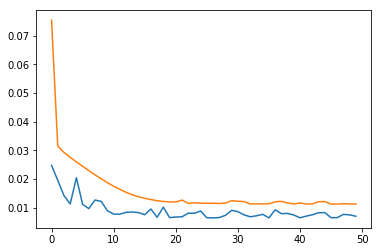

results/all/_Freeway12m_10months_1_history_10001000.250.json


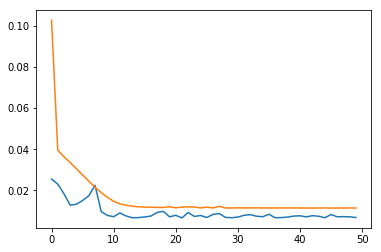

results/all/_Freeway12m_10months_1_history_1000100.250.json


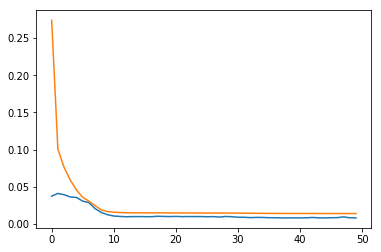

results/all/_Freeway12m_10months_1_history_1000500.250.json


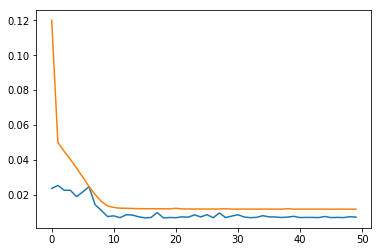

results/all/_Freeway12m_10months_1_history_5002000.250.json


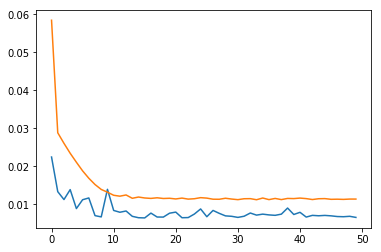

results/all/_Freeway12m_10months_1_history_5001000.250.json


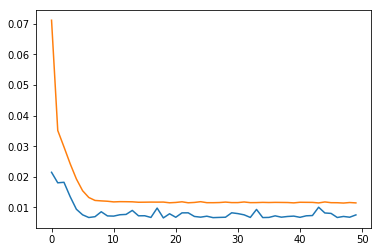

results/all/_Freeway12m_10months_1_history_500100.250.json


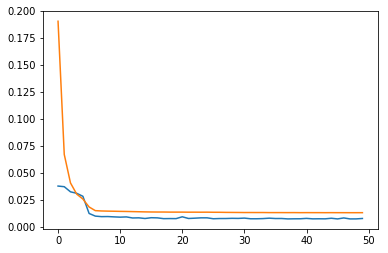

results/all/_Freeway12m_10months_1_history_500500.250.json


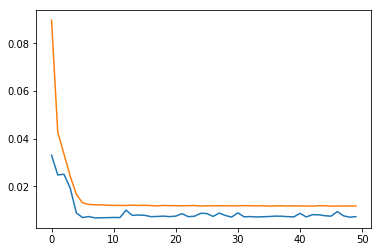

results/all/_Freeway12m_10months_1_history_2002000.250.json


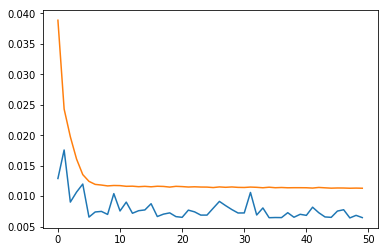

results/all/_Freeway12m_10months_1_history_2001000.250.json


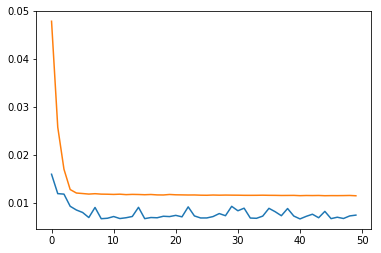

results/all/_Freeway12m_10months_1_history_200100.250.json


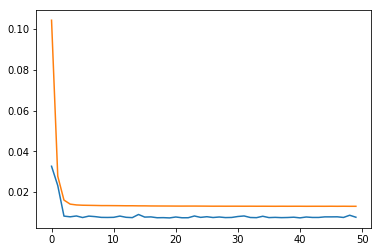

results/all/_Freeway12m_10months_1_history_200500.250.json


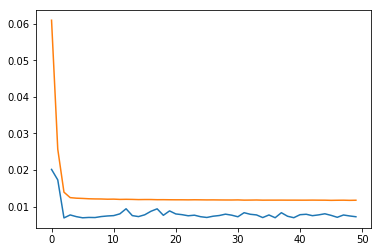

results/all/_Freeway12m_10months_12_history_10002000.250.json


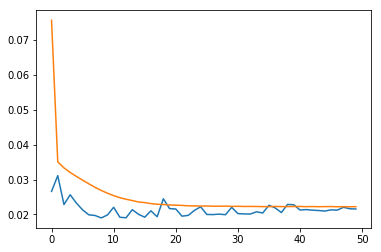

results/all/_Freeway12m_10months_12_history_10001000.250.json


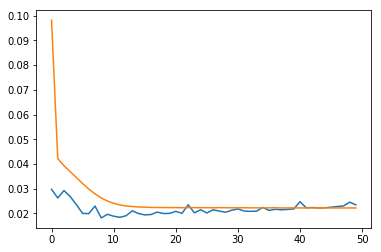

results/all/_Freeway12m_10months_12_history_1000100.250.json


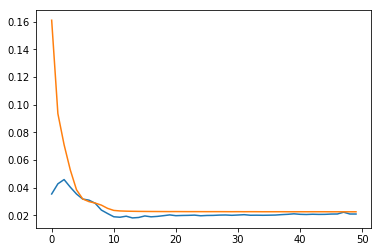

results/all/_Freeway12m_10months_12_history_1000500.250.json


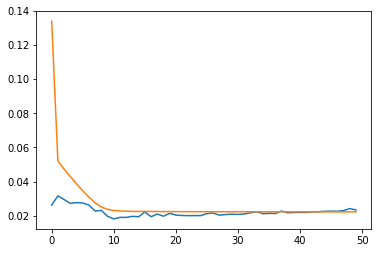

results/all/_Freeway12m_10months_12_history_5002000.250.json


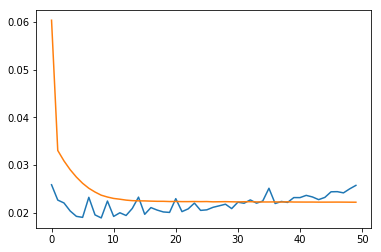

results/all/_Freeway12m_10months_12_history_5001000.250.json


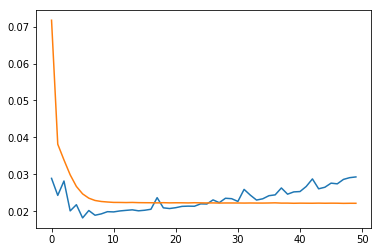

results/all/_Freeway12m_10months_12_history_500100.250.json


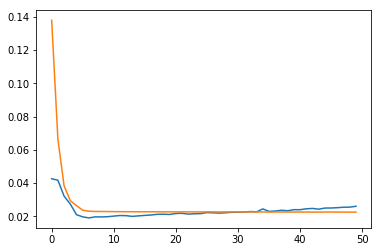

results/all/_Freeway12m_10months_12_history_500500.250.json


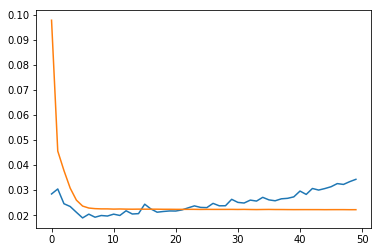

results/all/_Freeway12m_10months_12_history_2002000.250.json


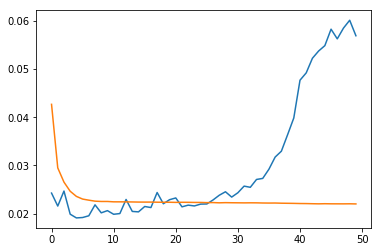

results/all/_Freeway12m_10months_12_history_2001000.250.json


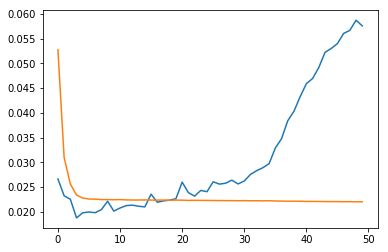

results/all/_Freeway12m_10months_12_history_200100.250.json


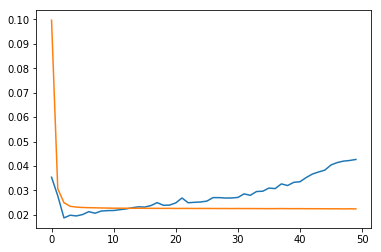

results/all/_Freeway12m_10months_12_history_200500.250.json


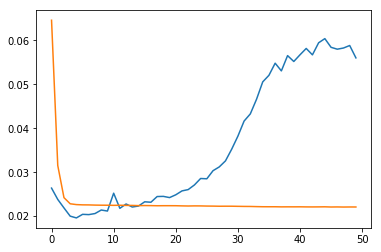

results/all/_Freeway12m_10months_3_history_10002000.250.json


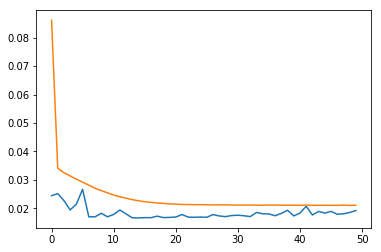

results/all/_Freeway12m_10months_3_history_10001000.250.json


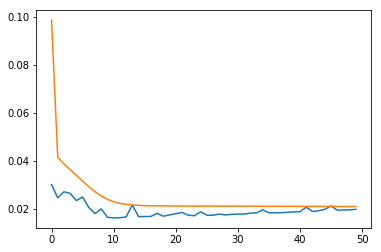

results/all/_Freeway12m_10months_3_history_1000100.250.json


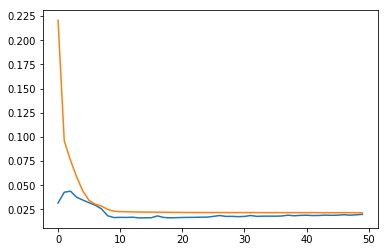

results/all/_Freeway12m_10months_3_history_1000500.250.json


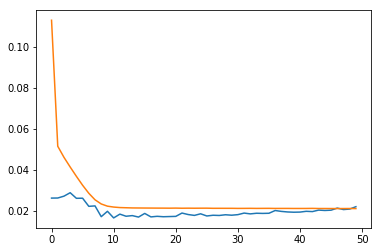

results/all/_Freeway12m_10months_3_history_5002000.250.json


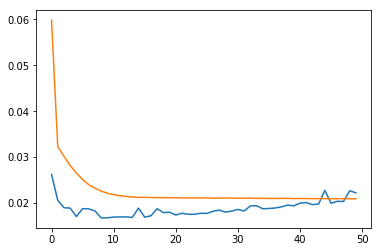

results/all/_Freeway12m_10months_3_history_5001000.250.json


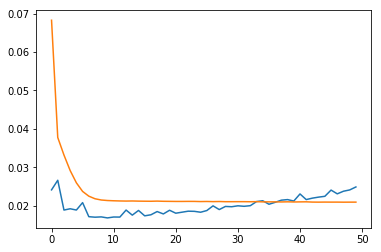

results/all/_Freeway12m_10months_3_history_500100.250.json


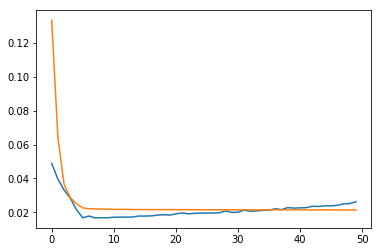

results/all/_Freeway12m_10months_3_history_500500.250.json


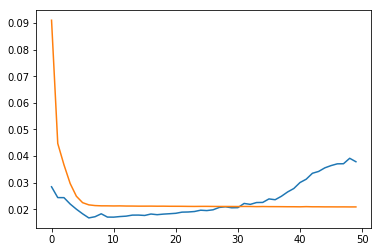

results/all/_Freeway12m_10months_3_history_2002000.250.json


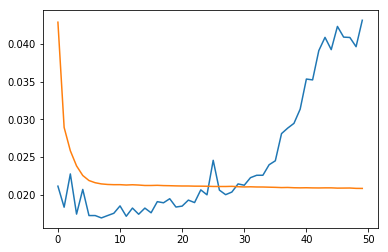

results/all/_Freeway12m_10months_3_history_2001000.250.json


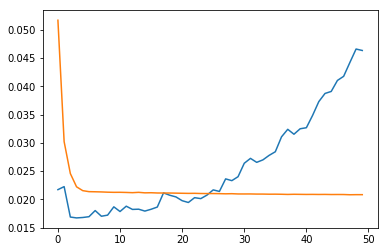

results/all/_Freeway12m_10months_3_history_200100.250.json


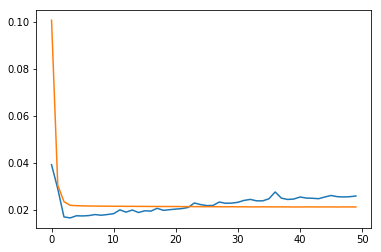

results/all/_Freeway12m_10months_3_history_200500.250.json


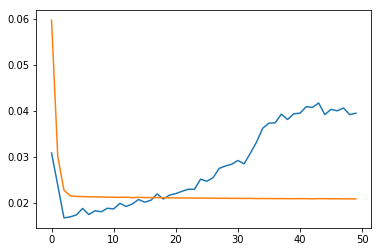

results/all/_Freeway12m_10months_6_history_10002000.250.json


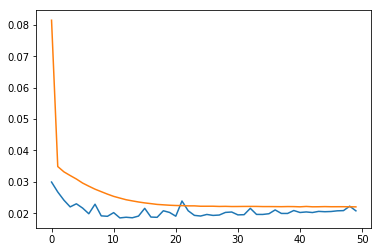

results/all/_Freeway12m_10months_6_history_10001000.250.json


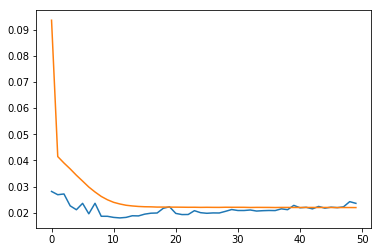

results/all/_Freeway12m_10months_6_history_1000100.250.json


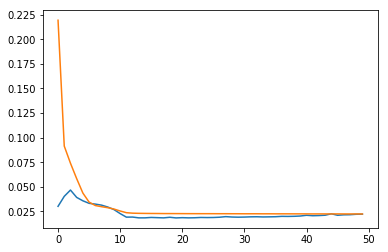

results/all/_Freeway12m_10months_6_history_1000500.250.json


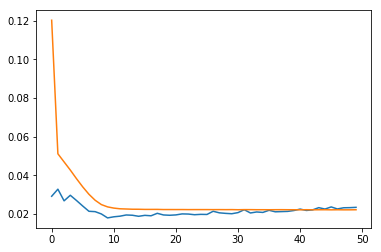

results/all/_Freeway12m_10months_6_history_5002000.250.json


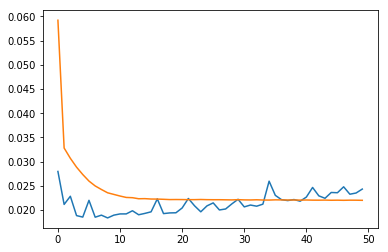

results/all/_Freeway12m_10months_6_history_5001000.250.json


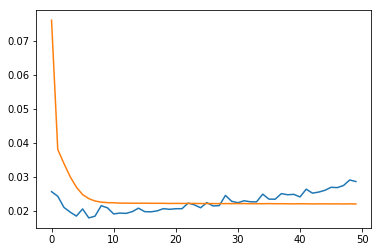

results/all/_Freeway12m_10months_6_history_500100.250.json


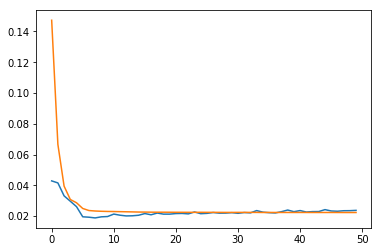

results/all/_Freeway12m_10months_6_history_500500.250.json


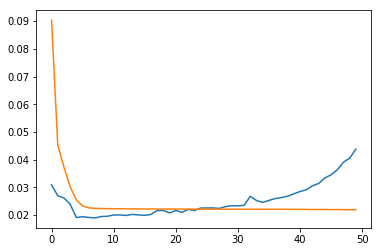

results/all/_Freeway12m_10months_6_history_2002000.250.json


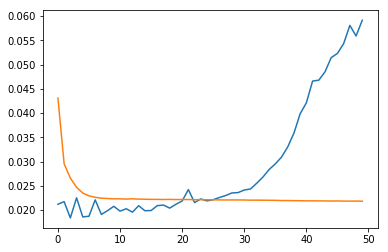

results/all/_Freeway12m_10months_6_history_2001000.250.json


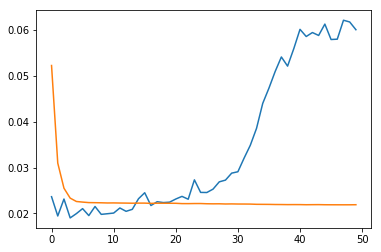

results/all/_Freeway12m_10months_6_history_200100.250.json


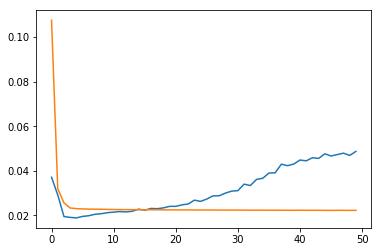

results/all/_Freeway12m_10months_6_history_200500.250.json


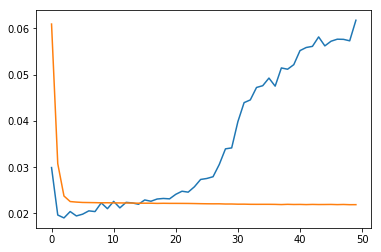

In [10]:
dir_path = 'results/all/'
histFiles = os.listdir(dir_path)
# batch_size = str(500); epoch = str(150)
# neurons=[10,50,100,200];epochs=[150];dropouts=[0.02,0.2,0.4];batch_sizes=[500]
neurons=[200, 100, 10,50];epochs=[100, 30, 50];dropouts=[0.2];batch_sizes=[1000, 500, 200]
training_data_folder = 'datasets/training_datasets/'
all_csv_files = os.listdir(training_data_folder)
for cur_tdata_file in all_csv_files:
    filename = cur_tdata_file.split('.csv')[0]
    for batch_size in batch_sizes:
        for neuron in neurons:
            for dropout in dropouts:
                for epoch in epochs:
                    fname = dir_path + '_' + filename + '_'+'history_' + str(batch_size) + str(neuron) +str(dropout) +str(epoch) +'.json'
                    if os.path.isfile(fname):
                        print (fname)
                        json_file = open(fname, 'r')
                        loaded_model_json = json.load(json_file)
                        json_file.close()
                        output = loaded_model_json['val_mean_absolute_error']
                        output_main = loaded_model_json['mean_absolute_error']
                        plt.plot(output)
                        plt.plot(output_main)
            plt.show()


In [11]:
from sklearn import preprocessing
from keras.models import model_from_json

Using TensorFlow backend.


In [106]:
def get_test_data(values):
    n_train_hours = int(len(values)*(3/3))
    test = values[:n_train_hours, :]
    test_X, test_y = test[:, :-1], test[:, -1]
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
    return [test_X,test_y]

def test_data(test_data_path, new_cols, device_id):
    merged_data = pd.read_csv(test_data_path)
    merged_data = merged_data[new_cols]
    merged_data = merged_data[merged_data['device_id'] == device_id]
    for norm_col in new_cols: 
        merged_data = norm_data_f(merged_data, norm_col)
    values_test = merged_data.values  
    [x_testdata,y_testdata]=get_test_data(values_test)
    return [x_testdata,y_testdata]

def norm_data_f(data, colv):
    min_max_scaler = preprocessing.MinMaxScaler()
    data[colv] = min_max_scaler.fit_transform(data[colv].astype(float).values.reshape(-1,1))
    return data

def plot_results(path, model, x_testdata, y_testdata):
    p = percentage_difference(model, x_testdata, y_testdata)
    data_read = pd.read_csv(path)
    outx = denormalize(data_read, p)
    newy_test = denormalize(data_read, y_testdata)
    error = abs(sum(newy_test-outx)/len(outx))
    return [outx, newy_test, error]
    
def percentage_difference(model, X_test, y_test):
    percentage_diff=[]

    p = model.predict(X_test)
    for u in range(len(y_test)): # for each data index in test data
        pr = p[u][0] # pr = prediction on day u

        percentage_diff.append((pr-y_test[u]/pr)*100)
    return p

def denormalize(data_df, normalized_value):
    df = data_df['INRIX_speed'].values.reshape(-1,1) 
    normalized_value = normalized_value.reshape(-1,1)
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new   

In [11]:
dir_path = 'results/all/'
raw_test_data_path = 'datasets/test_datasets/Freeway12m_2months_1.csv'
filename = os.path.basename(raw_test_data_path).split('.csv')[0]
cnt = -1; 
test_data_read = pd.read_csv(raw_test_data_path)
device_ids = test_data_read['device_id'].unique()

In [32]:
clx = [ 'month','hour','dow','device_id','device_speed','meadianv','speed_2','INRIX_speed']
# neurons=[10,50,100,200];epochs=[150];dropouts=[0.02,0.2,0.4];batch_sizes=[500]
neurons=[200, 100, 10,50];epochs=[100, 30, 50];dropouts=[0.2];batch_sizes=[1000, 500, 200]
cols =['filename',  'device_id', 'batchsize','neuron','mean', 'std', 'min', '25%', '50%', '75%', 'max'] 
output_pms =pd.DataFrame(columns=cols)

testing_data_folder = 'datasets/test_datasets/'
all_csv_files = os.listdir(testing_data_folder)
output_pms.to_csv('results/error.csv', mode='a', header=True, index=False)
for cur_tdata_file in all_csv_files:
    filename = cur_tdata_file.split('.csv')[0]
    filename = filename.replace('2months', '10months')
    raw_test_data_path = testing_data_folder + cur_tdata_file
    test_data_read = pd.read_csv(raw_test_data_path)
    device_ids = test_data_read['device_id'].unique()
    for device_id in device_ids:
        [x_testdata,y_testdata] = test_data(raw_test_data_path, clx, device_id)
        error_list = [];
        for batch_size in batch_sizes:
            for neuron in neurons:
                for dropout in dropouts:
                    for epoch in epochs:
                        jname = dir_path + '_' + filename + '_'+ 'model_' + str(batch_size) + str(neuron) +str(dropout) +str(epoch) +'.json'
                        fname = dir_path + '_' + filename + '_'+ 'model_' + str(batch_size) + str(neuron) +str(dropout) +str(epoch) +'.h5'
                        if os.path.isfile(jname):
                            print (jname + "_"+ str(device_id))                            
                            json_file = open(jname, 'r')
                            loaded_model_json = json_file.read()
                            json_file.close()
                            loaded_model = model_from_json(loaded_model_json)
                            loaded_model.load_weights(fname)
                            loaded_model.compile(loss='mae', optimizer='adam', metrics=['mae'])
                            [outx, newy_test, error] = plot_results(raw_test_data_path, loaded_model, x_testdata, y_testdata)
                            error_list.append(error)
                            if len(error_list)>0:
                                error_list_pms = [filename, device_id, batch_size, neuron, 
                                                  np.mean(error_list), np.std(error_list),
                                                  np.min(error_list),np.percentile(error_list,25),
                                                  np.percentile(error_list, 50),np.percentile(error_list, 75),
                                                 np.max(error_list)] 
                                output_pms.loc[len(output_pms)] = error_list_pms
            output_pms.to_csv('results/error.csv', mode='a', header=False, index=False)
            output_pms =pd.DataFrame(columns=cols)


results/all/_Freeway12m_10months_1_model_10002000.250.json_1
results/all/_Freeway12m_10months_1_model_10001000.250.json_1
results/all/_Freeway12m_10months_1_model_1000100.250.json_1
results/all/_Freeway12m_10months_1_model_1000500.250.json_1
results/all/_Freeway12m_10months_1_model_5002000.250.json_1
results/all/_Freeway12m_10months_1_model_5001000.250.json_1
results/all/_Freeway12m_10months_1_model_500100.250.json_1
results/all/_Freeway12m_10months_1_model_500500.250.json_1
results/all/_Freeway12m_10months_1_model_2002000.250.json_1
results/all/_Freeway12m_10months_1_model_2001000.250.json_1
results/all/_Freeway12m_10months_1_model_200100.250.json_1
results/all/_Freeway12m_10months_1_model_200500.250.json_1
results/all/_Freeway12m_10months_1_model_10002000.250.json_2
results/all/_Freeway12m_10months_1_model_10001000.250.json_2
results/all/_Freeway12m_10months_1_model_1000100.250.json_2
results/all/_Freeway12m_10months_1_model_1000500.250.json_2
results/all/_Freeway12m_10months_1_model

results/all/_Freeway12m_10months_12_model_5001000.250.json_1
results/all/_Freeway12m_10months_12_model_500100.250.json_1
results/all/_Freeway12m_10months_12_model_500500.250.json_1
results/all/_Freeway12m_10months_12_model_2002000.250.json_1
results/all/_Freeway12m_10months_12_model_2001000.250.json_1
results/all/_Freeway12m_10months_12_model_200100.250.json_1
results/all/_Freeway12m_10months_12_model_200500.250.json_1
results/all/_Freeway12m_10months_12_model_10002000.250.json_2
results/all/_Freeway12m_10months_12_model_10001000.250.json_2
results/all/_Freeway12m_10months_12_model_1000100.250.json_2
results/all/_Freeway12m_10months_12_model_1000500.250.json_2
results/all/_Freeway12m_10months_12_model_5002000.250.json_2
results/all/_Freeway12m_10months_12_model_5001000.250.json_2
results/all/_Freeway12m_10months_12_model_500100.250.json_2
results/all/_Freeway12m_10months_12_model_500500.250.json_2
results/all/_Freeway12m_10months_12_model_2002000.250.json_2
results/all/_Freeway12m_10mo

results/all/_Freeway12m_10months_3_model_2002000.250.json_1
results/all/_Freeway12m_10months_3_model_2001000.250.json_1
results/all/_Freeway12m_10months_3_model_200100.250.json_1
results/all/_Freeway12m_10months_3_model_200500.250.json_1
results/all/_Freeway12m_10months_3_model_10002000.250.json_2
results/all/_Freeway12m_10months_3_model_10001000.250.json_2
results/all/_Freeway12m_10months_3_model_1000100.250.json_2
results/all/_Freeway12m_10months_3_model_1000500.250.json_2
results/all/_Freeway12m_10months_3_model_5002000.250.json_2
results/all/_Freeway12m_10months_3_model_5001000.250.json_2
results/all/_Freeway12m_10months_3_model_500100.250.json_2
results/all/_Freeway12m_10months_3_model_500500.250.json_2
results/all/_Freeway12m_10months_3_model_2002000.250.json_2
results/all/_Freeway12m_10months_3_model_2001000.250.json_2
results/all/_Freeway12m_10months_3_model_200100.250.json_2
results/all/_Freeway12m_10months_3_model_200500.250.json_2
results/all/_Freeway12m_10months_3_model_100

results/all/_Freeway12m_10months_6_model_10001000.250.json_2
results/all/_Freeway12m_10months_6_model_1000100.250.json_2
results/all/_Freeway12m_10months_6_model_1000500.250.json_2
results/all/_Freeway12m_10months_6_model_5002000.250.json_2
results/all/_Freeway12m_10months_6_model_5001000.250.json_2
results/all/_Freeway12m_10months_6_model_500100.250.json_2
results/all/_Freeway12m_10months_6_model_500500.250.json_2
results/all/_Freeway12m_10months_6_model_2002000.250.json_2
results/all/_Freeway12m_10months_6_model_2001000.250.json_2
results/all/_Freeway12m_10months_6_model_200100.250.json_2
results/all/_Freeway12m_10months_6_model_200500.250.json_2
results/all/_Freeway12m_10months_6_model_10002000.250.json_3
results/all/_Freeway12m_10months_6_model_10001000.250.json_3
results/all/_Freeway12m_10months_6_model_1000100.250.json_3
results/all/_Freeway12m_10months_6_model_1000500.250.json_3
results/all/_Freeway12m_10months_6_model_5002000.250.json_3
results/all/_Freeway12m_10months_6_model_

In [33]:
tdf = output_pms.T
tdf.head()

""
filename
device_id
batchsize
neuron
mean


In [34]:
error_df = pd.read_csv('results/error.csv')

In [35]:
error_df.head()

,filename,device_id,batchsize,neuron,mean,std,min,25%,50%,75%,max
0,Freeway12m_10months_1,1,1000,200,0.142662,0.000000,0.142662,0.142662,0.142662,0.142662,0.142662
1,Freeway12m_10months_1,1,1000,100,0.084057,0.058605,0.025452,0.054754,0.084057,0.113360,0.142662
2,Freeway12m_10months_1,1,1000,10,0.092610,0.049356,0.025452,0.067583,0.109715,0.126188,0.142662
3,Freeway12m_10months_1,1,1000,50,0.100881,0.045080,0.025452,0.088649,0.117704,0.129936,0.142662
4,Freeway12m_10months_1,1,500,200,0.097331,0.040941,0.025452,0.083132,0.109715,0.125694,0.142662


In [44]:
filenames = error_df['filename'].unique()
device_id_u = error_df['device_id'].unique()
batch_u = error_df['batchsize'].unique() 
neuron_u = error_df['neuron'].unique()
cols =['filename',  'batchsize_neuron','mean', 'std', 'min', '25%', '50%', '75%', 'max'] 
output_error_pms =pd.DataFrame(columns=cols)
for filename in filenames:
    for batch in batch_u:
        for neuron in neuron_u:
            filter_data = error_df[(error_df['filename']==filename) & (error_df['batchsize']==batch) 
                                   & (error_df['neuron']==neuron)]
#             print (filter_data)
            
            cur_list = [filename, str(batch) + ':'+str(neuron), filter_data['mean'].mean(), 
                        filter_data['std'].mean(), filter_data['min'].mean(), filter_data['25%'].mean(),
                        filter_data['50%'].mean(), filter_data['75%'].mean(), filter_data['max'].mean()]
            output_error_pms.loc[len(output_error_pms)] = cur_list

In [46]:
output_error_pms.sort_values('mean').head()

,filename,batchsize_neuron,mean,std,min,25%,50%,75%,max
1,Freeway12m_10months_1,1000:100,0.253171,0.029694,0.223477,0.238324,0.253171,0.268018,0.282865
0,Freeway12m_10months_1,1000:200,0.272063,0.000000,0.272063,0.272063,0.272063,0.272063,0.272063
5,Freeway12m_10months_1,500:100,0.283832,0.090450,0.156119,0.235375,0.276262,0.323163,0.433808
9,Freeway12m_10months_1,200:100,0.285089,0.101837,0.151912,0.212848,0.266320,0.334702,0.492139
11,Freeway12m_10months_1,200:50,0.288402,0.101219,0.151912,0.213188,0.269545,0.340885,0.502216


In [47]:
output_error_pms.to_csv('results/batch_neuron_error.csv',index=False)

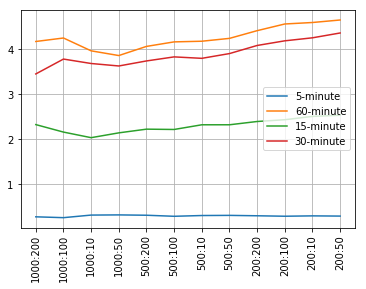

In [88]:
error_df = pd.read_csv('results/batch_neuron_error.csv')
filenames = error_df['filename'].unique()
labels = ['5-minute','60-minute','15-minute','30-minute']
indx = 0
for filename in filenames:
    filter_data = error_df[(error_df['filename']==filename)]
#     filter_data['mean'].plot()
    plt.plot(filter_data['batchsize_neuron'], filter_data['mean'].values, label=labels[indx])
    plt.xticks(rotation='vertical')
    plt.legend(loc=5)
    
    indx+=1
plt.grid()
plt.show()


In [86]:
error_df = pd.read_csv('results/batch_neuron_error.csv')
filenames = error_df['filename'].unique()
labels = ['5-minute','60-minute','15-minute','30-minute']
indx = 0
cols =['mean', 'std', 'min', '25%', '50%', '75%', 'max'] 
output_error_pmsx =pd.DataFrame(columns=cols)
for filename in filenames:
    filter_data = error_df[(error_df['filename']==filename)]
    output_error_pmsx.loc[len(output_error_pmsx)] = filter_data[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].mean().values
#     filter_data[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].mean().boxplot()
#     plt.show()
#     plt.plot(filter_data['batchsize_neuron'], filter_data['mean'].values, label=labels[indx])
#     plt.xticks(rotation='vertical')
#     plt.legend(loc=5)
    
#     indx+=1
# plt.grid()
# plt.show()

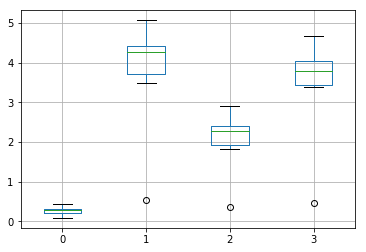

In [87]:
output_error_pmsx.T.boxplot()

In [119]:
def denormalize_test(data_df, normalized_value):
    df_attr =data_df[['hour', 'volume','device_distance']] 
    df = data_df['INRIX_speed'].values.reshape(-1,1) 
    normalized_value = normalized_value.reshape(-1,1)
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
#     print ('subset data')
#     print (df_attr.shape)
    return [new, df_attr]
            
def plot_results_test(path, device_id, model, x_testdata, y_testdata):
    p = percentage_difference(model, x_testdata, y_testdata)
    data_read = pd.read_csv(path)
    data_read = data_read[data_read['device_id']==device_id]
#     print ('original data')
#     print (data_read.shape)
    [outx,df_attr] = denormalize_test(data_read, p)
    newy_test = denormalize(data_read, y_testdata)
    error = abs(newy_test-outx)
    df_attr['error'] = error
#     print ('error')
#     print (len(error))
    return [outx, newy_test, error, df_attr]

In [129]:
clx = [ 'month','hour','dow','device_id','device_speed','meadianv','speed_2','INRIX_speed']
hyperPms = [[1000,100,0.2,50],[1000,50,0.2,50],[1000,10,0.2,50],[1000,200,0.2,50]]
cols =['filename',  'device_id', 'hour','error'] 
output_pms_time =pd.DataFrame(columns=cols)

testing_data_folder = 'datasets/test_datasets/'
all_csv_files = os.listdir(testing_data_folder)
output_pms_time.to_csv('results/error_time.csv', mode='a', header=True, index=False)
cnt=0
for cur_tdata_file in all_csv_files:
    print (cur_tdata_file)
    cur_hyperPms = hyperPms[cnt]
    filename = cur_tdata_file.split('.csv')[0]
    filename = filename.replace('2months', '10months')
    jname = dir_path + '_' + filename + '_'+ 'model_' + str(cur_hyperPms[0]) + str(cur_hyperPms[1]) +str(cur_hyperPms[2]) +str(cur_hyperPms[3]) +'.json'
    fname = dir_path + '_' + filename + '_'+ 'model_' + str(cur_hyperPms[0]) + str(cur_hyperPms[1]) +str(cur_hyperPms[2]) +str(cur_hyperPms[3]) +'.h5'
    if os.path.isfile(jname):
        print (jname)
        raw_test_data_path = testing_data_folder + cur_tdata_file
        test_data_read = pd.read_csv(raw_test_data_path)
        device_ids = test_data_read['device_id'].unique()
        json_file = open(jname, 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        loaded_model = model_from_json(loaded_model_json)
        loaded_model.load_weights(fname)
        loaded_model.compile(loss='mae', optimizer='adam', metrics=['mae'])
        print ('model_loaded!!')
        for device_id in device_ids:
            [x_testdata,y_testdata] = test_data(raw_test_data_path, clx, device_id)
            error_list = [];
            [outx, newy_test, error, df_attr] = plot_results_test(raw_test_data_path,device_id, loaded_model, x_testdata, y_testdata)
            unique_hour = df_attr['hour'].unique() 
            for cur_hour in unique_hour:
                cur_hour_data = df_attr[df_attr['hour']==cur_hour]
                error_hour = cur_hour_data['error'].mean()
                output_pms_time.loc[len(output_pms_time)] = [cur_tdata_file, device_id, cur_hour, error_hour]
            
            output_pms_time.to_csv('results/error_time.csv', mode='a', header=False, index=False)
            output_pms_time =pd.DataFrame(columns=cols)
#             error_list.append(error)
    
    
    cnt+=1

Freeway12m_2months_1.csv
results/all/_Freeway12m_10months_1_model_10001000.250.json
model_loaded!!


C:\ProgramData\Anaconda3\envs\tensorflow2\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Freeway12m_2months_12.csv
results/all/_Freeway12m_10months_12_model_1000500.250.json
model_loaded!!
Freeway12m_2months_3.csv
results/all/_Freeway12m_10months_3_model_1000100.250.json
model_loaded!!
Freeway12m_2months_6.csv
results/all/_Freeway12m_10months_6_model_10002000.250.json
model_loaded!!


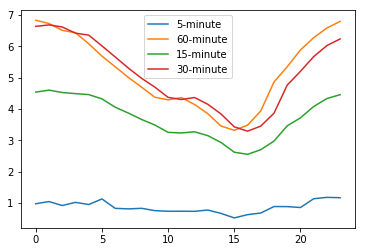

In [139]:
error_time = pd.read_csv('results/error_time.csv')
labels = ['5-minute','60-minute','15-minute','30-minute']
indx = 0
for cur_file in error_time['filename'].unique():
    
    cur_data = error_time[error_time['filename']==cur_file]
    hour_error_list = []
    for cur_hour in cur_data['hour'].unique():
        cur_data_hour = cur_data[cur_data['hour']==cur_hour]
        hour_error_list.append(cur_data_hour['error'].mean())
    plt.plot(hour_error_list, label=labels[indx])
    plt.legend()
    indx+=1
plt.show()

In [140]:
import seaborn as sns

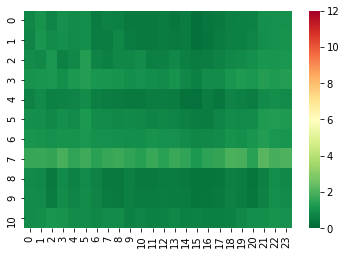

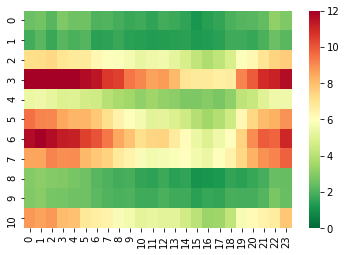

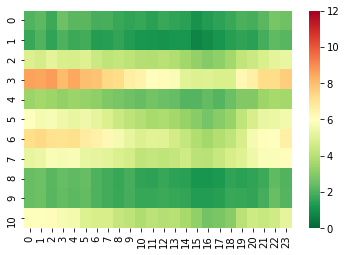

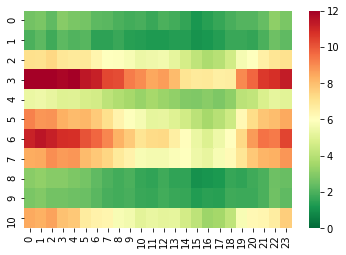

In [181]:
cols =['0',  '1', '2','3','4',  '5', '6','7','8',  '9', '10','11','12',
      '13','14','15','16','17','18','19','20','21','22','23'] 
heatmaps =pd.DataFrame(columns=cols)
for cur_file in error_time['filename'].unique():
    cur_data = error_time[error_time['filename']==cur_file]
    for cur_device in cur_data['device_id'].unique():
        cur_data_device = cur_data[cur_data['device_id']==cur_device]
        cerror = cur_data_device.sort_values(['filename','device_id', 'hour'])
        cerror = cerror['error'].values
        heatmaps.loc[len(heatmaps)] = cerror
    sns.heatmap(heatmaps, cmap='RdYlGn_r', vmin=0, vmax=12, annot=False)
    plt.show()
    heatmaps =pd.DataFrame(columns=cols)
#         print (cur_data_device.sort_values(['filename','device_id', 'hour']).head())

In [163]:
heatmaps.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.788428,1.098505,0.722539,1.040930,0.908950,0.951613,0.491504,0.679044,0.605167,0.456986,...,0.473606,0.231679,0.419680,0.440460,0.587544,0.621090,0.690797,0.987728,1.033455,1.061346
1,0.747990,1.163051,0.850046,1.000312,0.873132,0.956447,0.538729,0.554946,0.754983,0.484451,...,0.485212,0.198859,0.361797,0.469392,0.636001,0.635242,0.717722,0.980597,1.065124,1.108812
2,0.900652,0.798771,1.215413,0.646519,0.830924,1.386961,0.704274,0.566059,0.768208,0.792571,...,0.588433,0.487168,0.554844,0.695918,0.815656,0.848722,1.028861,1.177017,1.133058,1.210818
3,1.086549,1.146302,1.180931,0.943369,1.234985,1.375524,1.217355,1.159197,1.107811,0.961796,...,0.820962,0.622963,0.895269,0.910086,1.164808,1.283788,1.177624,1.379900,1.277067,1.381260
4,0.672737,0.872292,0.616627,0.697904,0.721282,0.905094,0.602880,0.535643,0.509585,0.442273,...,0.308506,0.259363,0.520592,0.392670,0.730063,0.622281,0.517667,0.887213,0.959786,0.870629


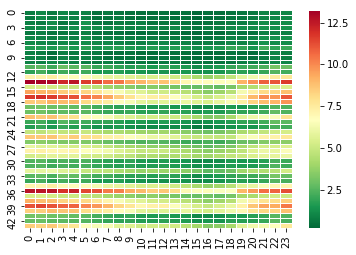

In [169]:
sns.heatmap(heatmaps, cmap='RdYlGn_r', linewidths=0.005, annot=False)

In [142]:
idx= ['aaa','bbb','ccc','ddd','eee']
cols = list('ABCD')
df = pd.DataFrame(abs(np.random.randn(5,4)), index=idx, columns=cols)
df.head()

,A,B,C,D
aaa,0.771900,0.992918,0.399992,1.367004
bbb,1.417190,0.161746,0.325920,1.200874
ccc,0.548120,0.436241,0.278198,1.761594
ddd,1.074542,0.059023,0.840342,0.109254
eee,0.693690,2.303026,0.665608,0.023503


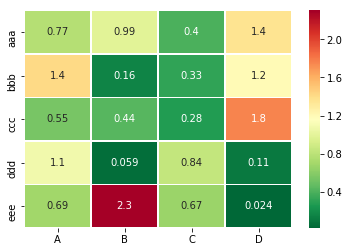

In [143]:
sns.heatmap(df, cmap='RdYlGn_r', linewidths=0.5, annot=True)